<a href="https://colab.research.google.com/github/sudipta-data/Amazon-Electronic-Products-Sales-/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('electronics.csv')

# list of first 5 rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0


In [2]:
# List of last 5 rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
32895,828,31711,5.0,2009-09-26,Male,Computers & Accessories,NaN,2008.0,NaN,0.0
32896,930,31712,5.0,2009-09-26,Female,Television & Video,NaN,2009.0,Male,0.0
32897,457,31713,5.0,2009-09-26,Male,Computers & Accessories,NaN,2007.0,NaN,0.0
32898,887,31714,3.0,2009-09-26,Male,Camera & Photo,NaN,2009.0,NaN,0.0
32899,350,31715,4.0,2009-09-26,Male,NaN,NaN,NaN,NaN,NaN


In [3]:
# Shape
dataset.shape

(32900, 10)

In [4]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32900 entries, 0 to 32899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     32900 non-null  int64  
 1   user_id     32900 non-null  int64  
 2   rating      32900 non-null  float64
 3   timestamp   32900 non-null  object 
 4   model_attr  32900 non-null  object 
 5   category    32899 non-null  object 
 6   brand       20145 non-null  object 
 7   year        32899 non-null  float64
 8   user_attr   2716 non-null   object 
 9   split       32899 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 2.5+ MB


In [5]:
# convert to timestamp
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

,timestamp
0,1999-06-13
1,1999-06-14
2,1999-06-17
3,1999-07-01
4,1999-07-06
...,...
32895,2009-09-26
32896,2009-09-26
32897,2009-09-26
32898,2009-09-26


In [6]:
# Convert to a string
dataset['brand'] = dataset['brand'].astype(str)

In [7]:
# Convert to a string
dataset['category'] = dataset['category'].astype(str)

In [8]:
# Convert to a timestamp
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [9]:
# Convert to a float
dataset['rating'] = dataset['rating'].astype(float)

In [10]:
# Convert to a String
dataset['user_id'] = dataset['user_id'].astype(str)

In [12]:
# Convert to a String
dataset['item_id'] = dataset['item_id'].astype(str)

In [13]:
# Statistical Summary of dataset
dataset.describe()

,rating,timestamp,year,split
count,32900.000000,32900,32899.000000,32899.000000
mean,3.942584,2007-09-01 06:15:34.905774848,2006.399556,0.044652
min,1.000000,1999-06-13 00:00:00,1999.000000,0.000000
25%,3.000000,2007-01-09 00:00:00,2005.000000,0.000000
50%,5.000000,2008-02-28 00:00:00,2007.000000,0.000000
75%,5.000000,2009-01-08 00:00:00,2008.000000,0.000000
max,5.000000,2009-09-26 00:00:00,2018.000000,2.000000
std,1.369716,NaN,2.557449,0.285919


In [15]:
# Number of Unique Users and items in the dataset
dataset.nunique()

,0
item_id,1150
user_id,31716
rating,5
timestamp,3065
model_attr,3
category,10
brand,32
year,20
user_attr,2
split,3


In [16]:
# Check for duplicates
dataset.duplicated().sum()

np.int64(0)

In [17]:
# Check for missing values
dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
model_attr,0
category,0
brand,0
year,1
user_attr,30184
split,1


In [18]:
# Distribution of ratings
dataset['rating'].value_counts()

,count
rating,
5.0,16478
4.0,7778
1.0,3770
3.0,2691
2.0,2183


In [19]:
# What was the best year of sales
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

,count
year,
2008,9428
2009,8664
2007,6798
2006,2614
2005,2170
2004,1275
2003,833
2002,481
2001,403


In [20]:
# What was best month of sales
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

,count
month,
1,3938
12,3189
8,3065
9,3040
7,2861
5,2706
3,2644
6,2600
2,2589


In [21]:
# Drop all null values

dataset.dropna(inplace=True)

# Check for missing values

dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
model_attr,0
category,0
brand,0
year,0
user_attr,0
split,0


Finding Answers with Visualization with the data we have

<Axes: xlabel='rating', ylabel='count'>

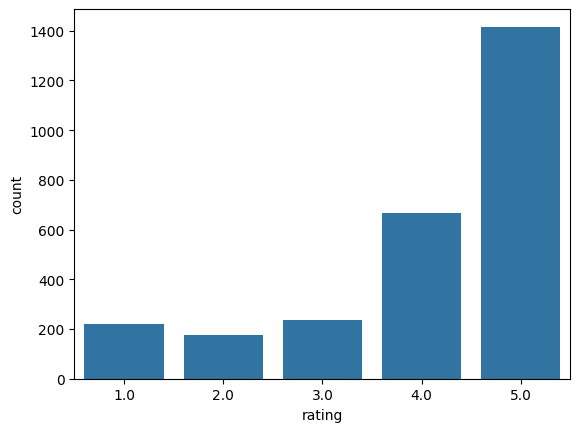

In [29]:
# the distribution of ratings

sns.countplot(x='rating', data=dataset)

In [25]:
dataset['rating'].value_counts()

,count
rating,
5.0,1416
4.0,666
3.0,236
1.0,222
2.0,176


<Axes: xlabel='year', ylabel='count'>

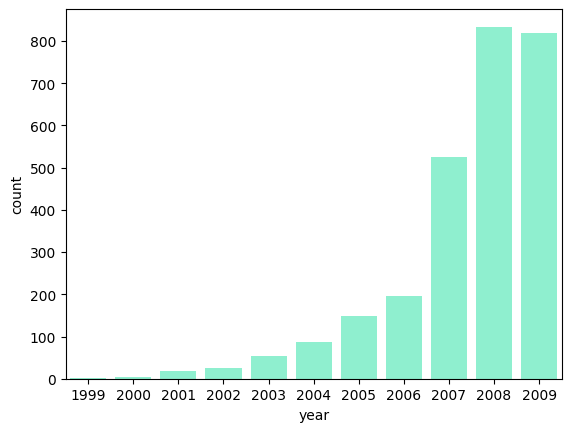

In [30]:
# the distribution of sales by year

sns.countplot(x='year', data=dataset, color='aquamarine')


<Axes: xlabel='brand', ylabel='count'>

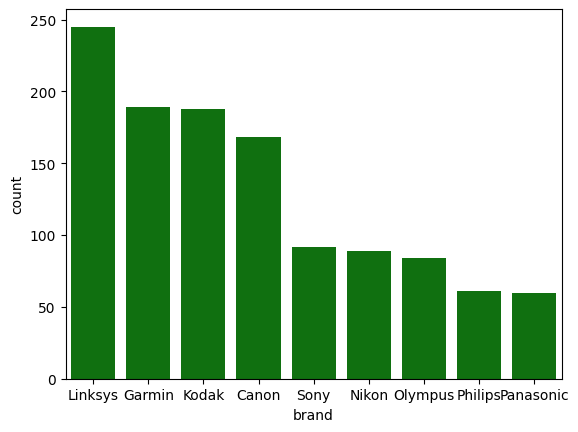

In [28]:
# brands with the most sales

sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index, color='green')

<Axes: xlabel='brand', ylabel='count'>

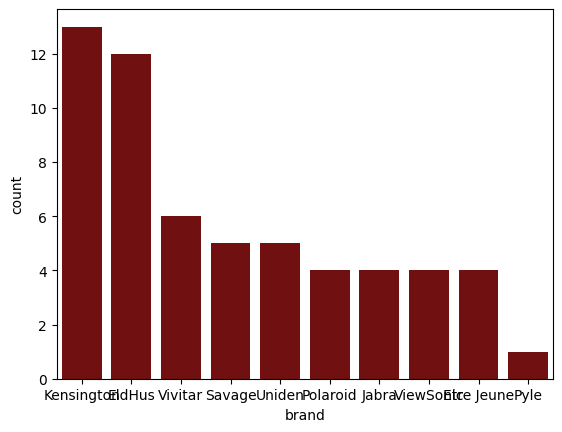

In [32]:
# What brand sold the least?

sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index, color='maroon')

<Axes: xlabel='brand', ylabel='count'>

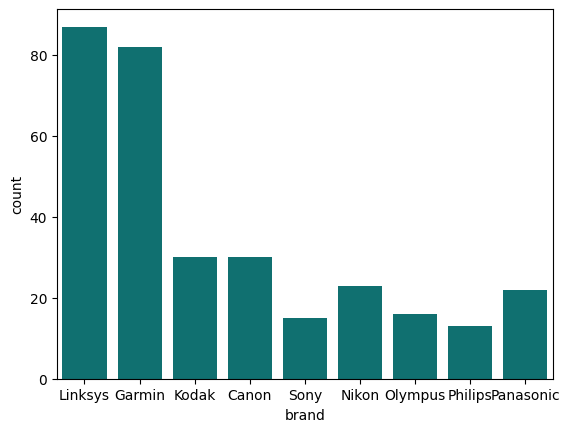

In [35]:
# brands with the most sales in 2008

sns.countplot(x='brand', data=dataset[dataset['year'] == 2008], order=dataset['brand'].value_counts().iloc[1:10].index, color='teal')

<Axes: xlabel='brand', ylabel='count'>

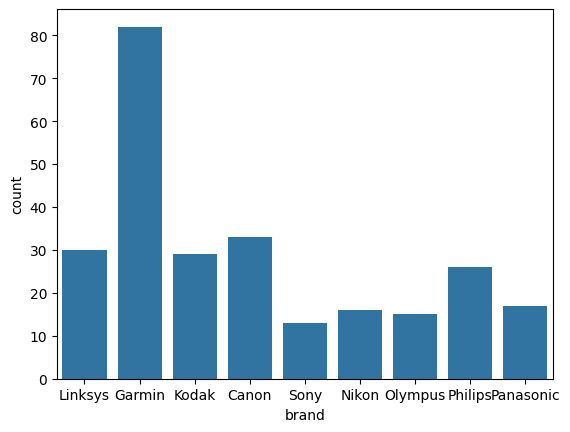

In [37]:
# Brands with the most sales in 2007

sns.countplot(x='brand', data=dataset[dataset['year'] == 2007], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

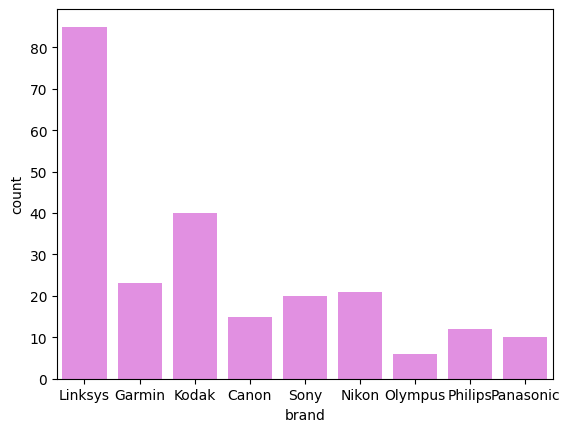

In [40]:
# brands with the most sales in 2009

sns.countplot(x='brand', data=dataset[dataset['year'] == 2009], order=dataset['brand'].value_counts().iloc[1:10].index, color='violet')

<Axes: xlabel='brand', ylabel='count'>

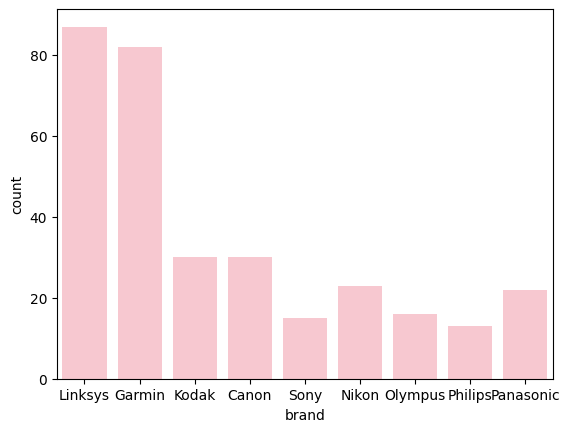

In [43]:
# As we see 2008 was the best sale year
# brands with the most sales in 2008

sns.countplot(x='brand', data=dataset[dataset['year'] == 2008], order=dataset['brand'].value_counts().iloc[1:10].index, color='pink')

<Axes: xlabel='month', ylabel='count'>

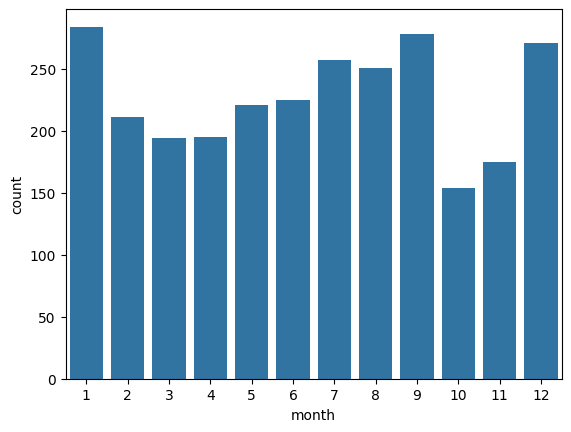

In [44]:
# month with most sales

sns.countplot(x='month', data=dataset)

<Axes: xlabel='category', ylabel='count'>

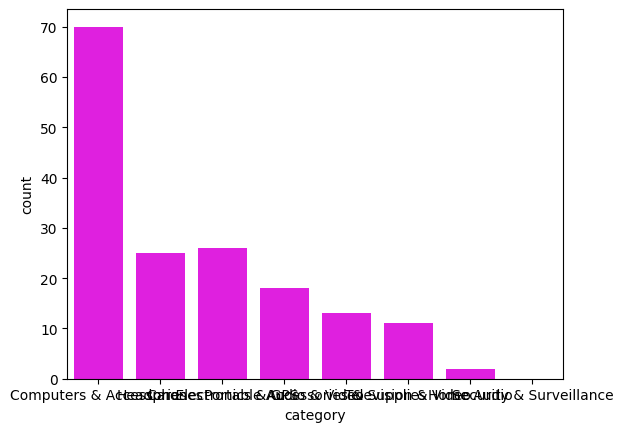

In [45]:
# What products by category were sold the most in January

sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index, color='magenta')

<Axes: xlabel='category', ylabel='count'>

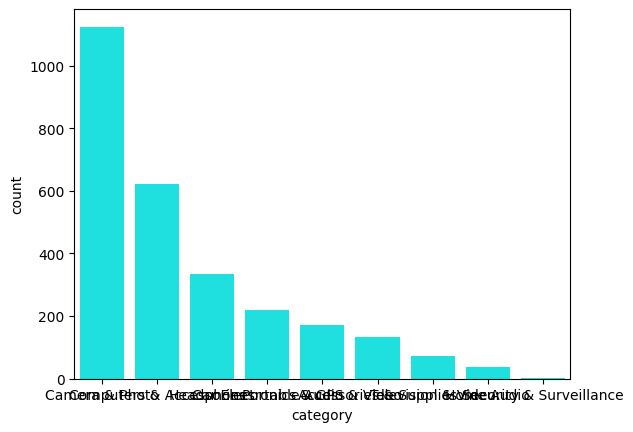

In [46]:
# Category with the least sales

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index, color='cyan')

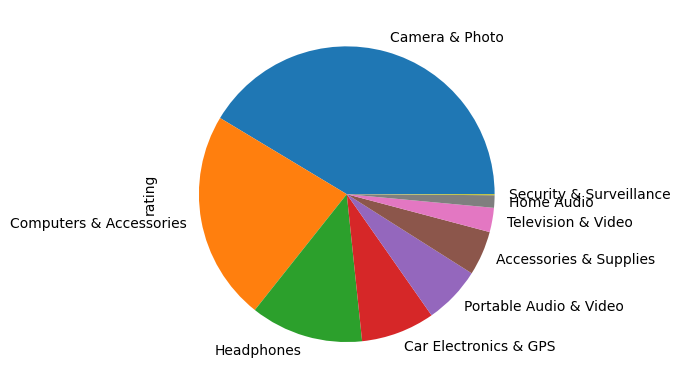

In [47]:
# distribution of sales presented in a pie chart

dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# white background

sns.set_style('white')